In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [21]:
img_size = 28 # pixels
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

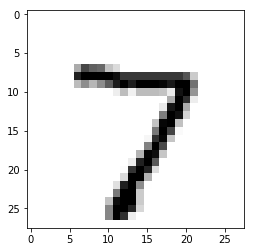

In [48]:
first = data.test.images[0].reshape(img_size, img_size)  # reshape from flat (768,1) to (28, 28)
plt.imshow(first, cmap='binary')

### Setup Graph

In [52]:
x = tf.placeholder(tf.float32, [None, img_size_flat])  # input layer is num_images x 768
y_true = tf.placeholder(tf.float32, [None, num_classes])  # true one-hot encoded values to compare with predictions 
y_true_cls = tf.placeholder(tf.int64, [None])  # the actual class of the image (non encoded)

In [51]:
# Variables to be optimized
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))  # weights are 768 x 10
biases = tf.Variable(tf.zeros([num_classes]))  # biases are 10 x 1

In [46]:
logits = tf.matmul(x, weights) + biases

In [47]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred)

In [53]:
# 10 x 1 matrix with the distance to the true value for each class
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)  
# the mean of the distances
cost = tf.reduce_mean(cross_entropy)  # this is the value we have to minimiz